<a href="https://colab.research.google.com/github/rdambrosioz/aa_2021/blob/main/aa_tarea2_costanzo_dambrosio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TAREA 2 DE APRENDIZAJE AUTOMÁTICO**
## Universidad de Montevideo
## Ing. en Infórmatica - Sem 2, 2021
### Docente: Sebastián Garcia


## Grupo 2:
* Bruno Costanzo
* Renzo D'Ambrosio

#PARTE 1

Efectúe un profundo EDA de los datasets entregados por el área de Operaciones Crediticias. Documente todas las observaciones que haga de los datos.

In [50]:
# Importamos paquetes necesarios
import sklearn as s
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp

In [2]:
# Cargamos los 2 datasets

df_contactos = pd.read_csv('https://raw.githubusercontent.com/rdambrosioz/aa_2021/main/DatasetContactos.csv', sep=';')
df_clientes = pd.read_csv('https://raw.githubusercontent.com/rdambrosioz/aa_2021/main/DatasetTrxs.csv')

### CONTACTOS

A continuación realizamos un analisis del dataset de los contactos.

In [3]:
df_contactos

,CUST_ID,PHONE,CONTACTS
0,C10001,+1 314-407-7397,2
1,C10002,+1 203-790-2151,2
2,C10003,+1 225-959-8209,3
3,C10004,+1 315-394-6219,0
4,C10005,+1 207-523-0823,0
...,...,...,...
8945,C19186,+1 236-768-6180,2
8946,C19187,+1 204-218-2544,1
8947,C19188,+1 506-873-0543,1
8948,C19189,+1 204-517-7879,3


(count    8950.000000
 mean        1.485587
 std         1.112995
 min         0.000000
 25%         0.000000
 50%         1.000000
 75%         2.000000
 max         3.000000
 Name: CONTACTS, dtype: float64,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f8002a05e50>)

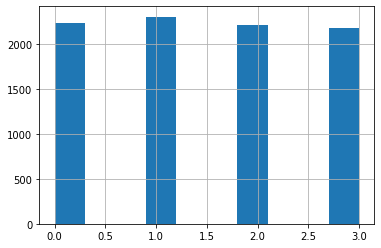

In [4]:
df_contactos['CONTACTS'].describe(), df_contactos['CONTACTS'].hist()

Hacemos más enfacis en el atrbuto de 'CONTACTS' que nos brinda la información de cuantas llamadas recibió un usuario en los últimos 60 días, dato muy importante para seleccionar a quien contactar para ofrecer el nuevo producto del banco. 

In [5]:
len(df_contactos['CUST_ID'].unique()), len(df_contactos['CUST_ID'])

(8950, 8950)

In [6]:
df_contactos.isnull().describe()

,CUST_ID,PHONE,CONTACTS
count,8950,8950,8950
unique,1,1,1
top,False,False,False
freq,8950,8950,8950


In [7]:
df_contactos.where(df_contactos['CONTACTS'] < 2).dropna()

,CUST_ID,PHONE,CONTACTS
3,C10004,+1 315-394-6219,0.0
4,C10005,+1 207-523-0823,0.0
5,C10006,+1 207-765-8240,0.0
6,C10007,+1 507-257-4838,1.0
7,C10008,+1 279-798-5201,0.0
...,...,...,...
8935,C19176,+1 418-510-4195,0.0
8941,C19182,+1 204-930-6179,0.0
8946,C19187,+1 204-218-2544,1.0
8947,C19188,+1 506-873-0543,1.0


In [8]:
len(df_contactos.where(df_contactos['CONTACTS'] >= 2).dropna())

4401

En esta parte se estudio en primer lugar si había valores nulos, lo cual no ocurre y luego removimos los usuarios cuyo valor en el atributo CONTACTS sea mayor o igual a 2 ya que a estos no los podemos contactar. Hay 4401 clientes los cuales no podemos contactar.

### CLIENTES

A continuación realizamos un analisis del dataset de los clientes.

In [9]:
df_clientes

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [10]:
df_clientes.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [11]:
df_clientes.isnull().describe()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950,8950,8950,8950,8950,8950,8950,8950,8950,8950,8950,8950,8950,8950,8950,8950,8950,8950
unique,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,2,1,1
top,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
freq,8950,8950,8950,8950,8950,8950,8950,8950,8950,8950,8950,8950,8950,8949,8950,8637,8950,8950


In [12]:
df_clientes.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

Vemos que los atributos CREDIT_LIMIT y MINIMUM_PAYMENTS tienen valores en nulo, hay que tomar una decisión sobre que hacer con esas instancias.

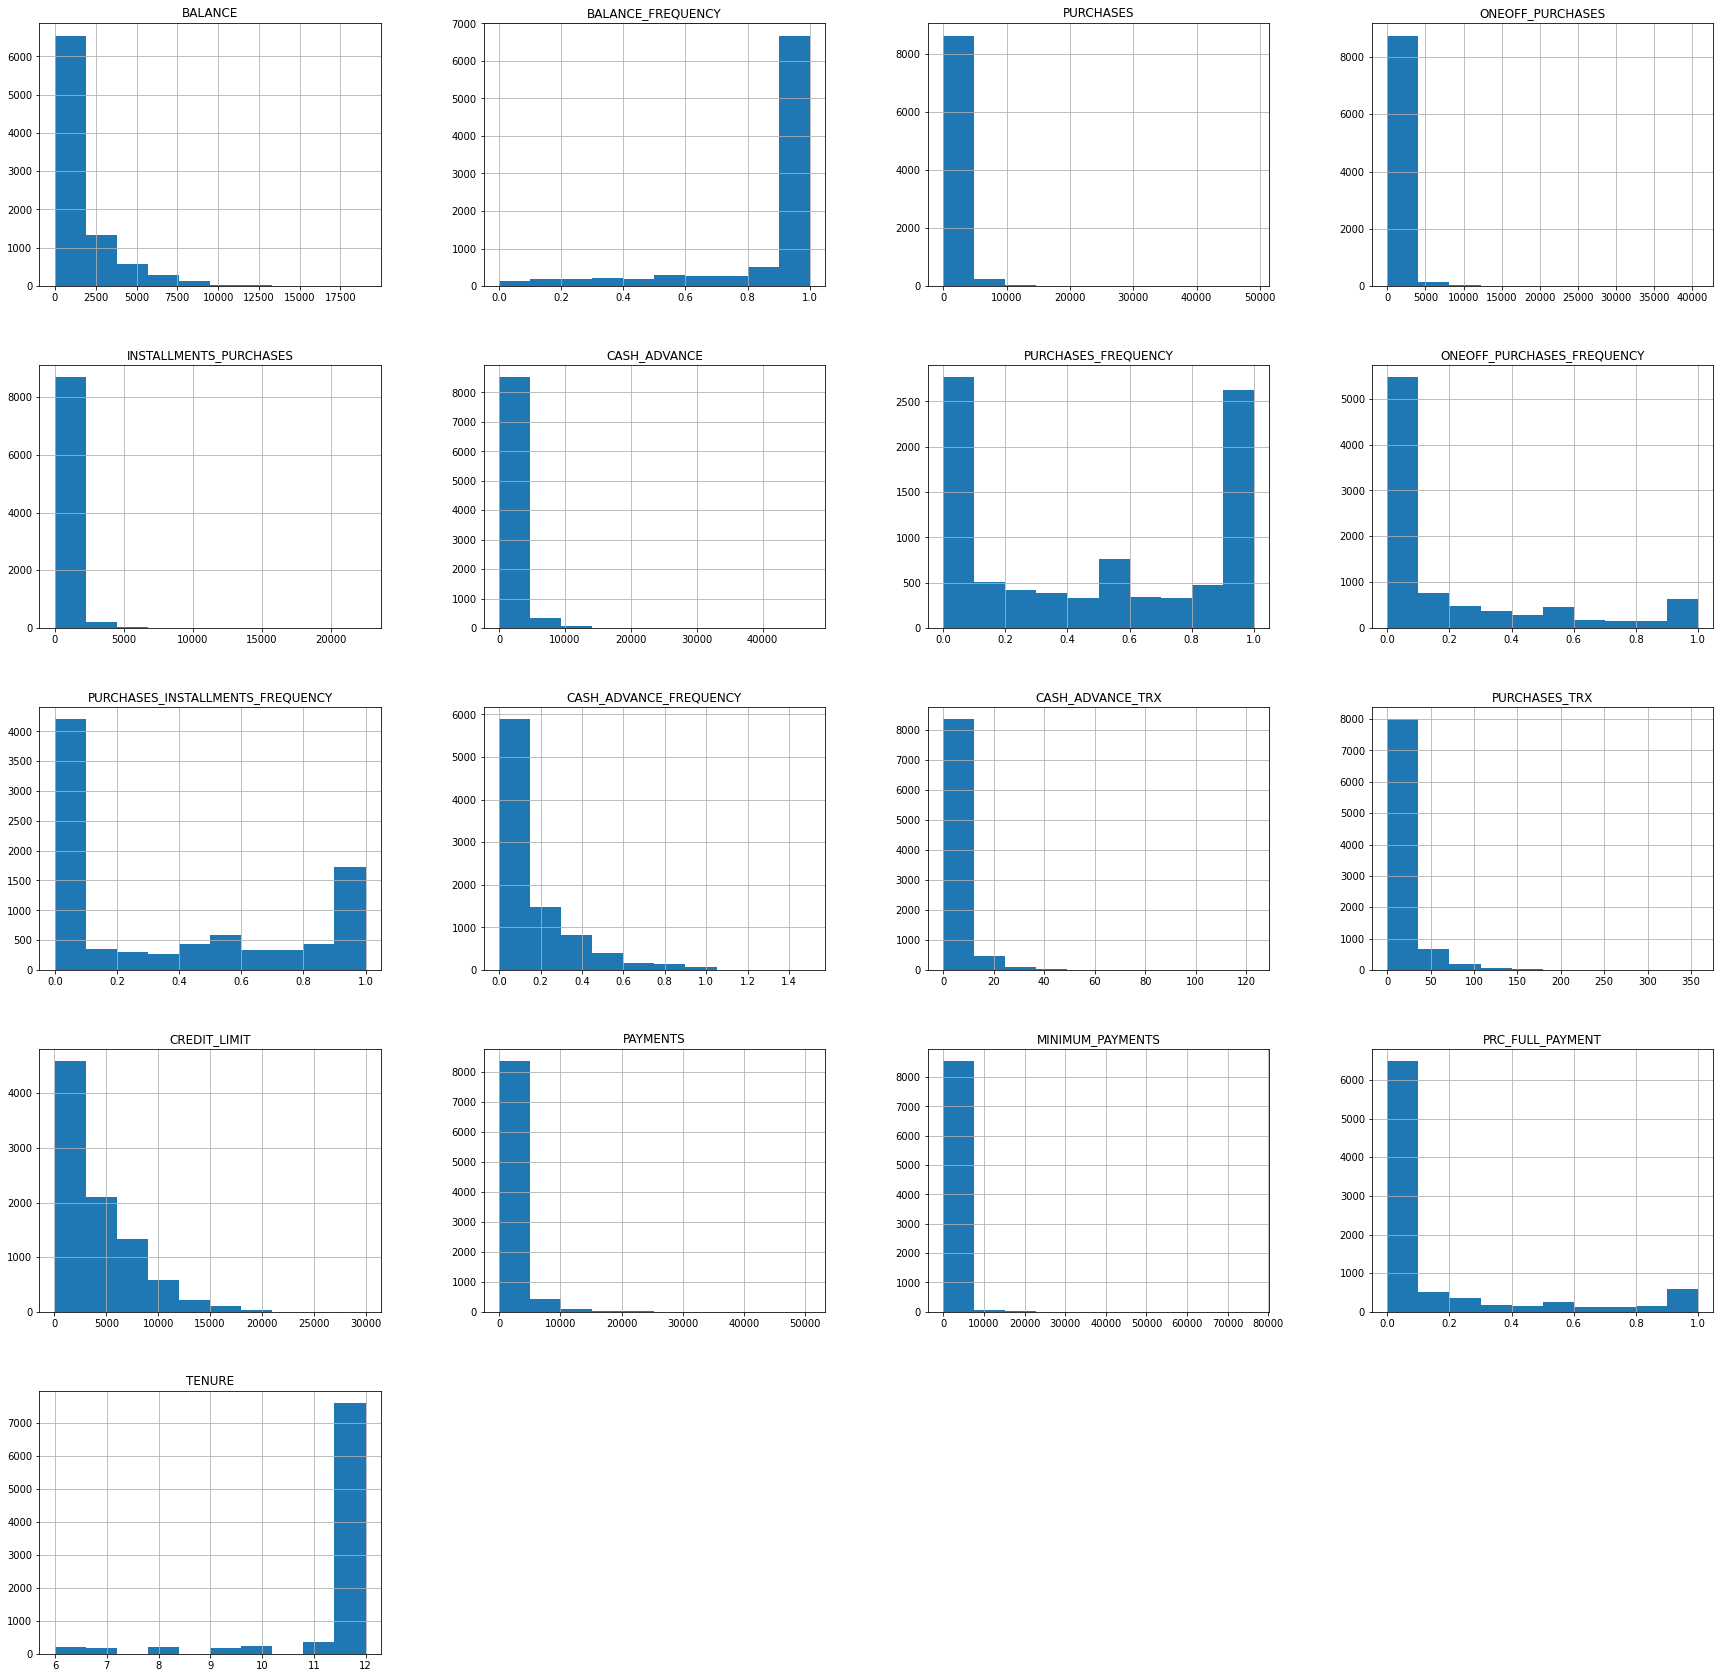

In [13]:
df_clientes.hist(figsize=(30,30))
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


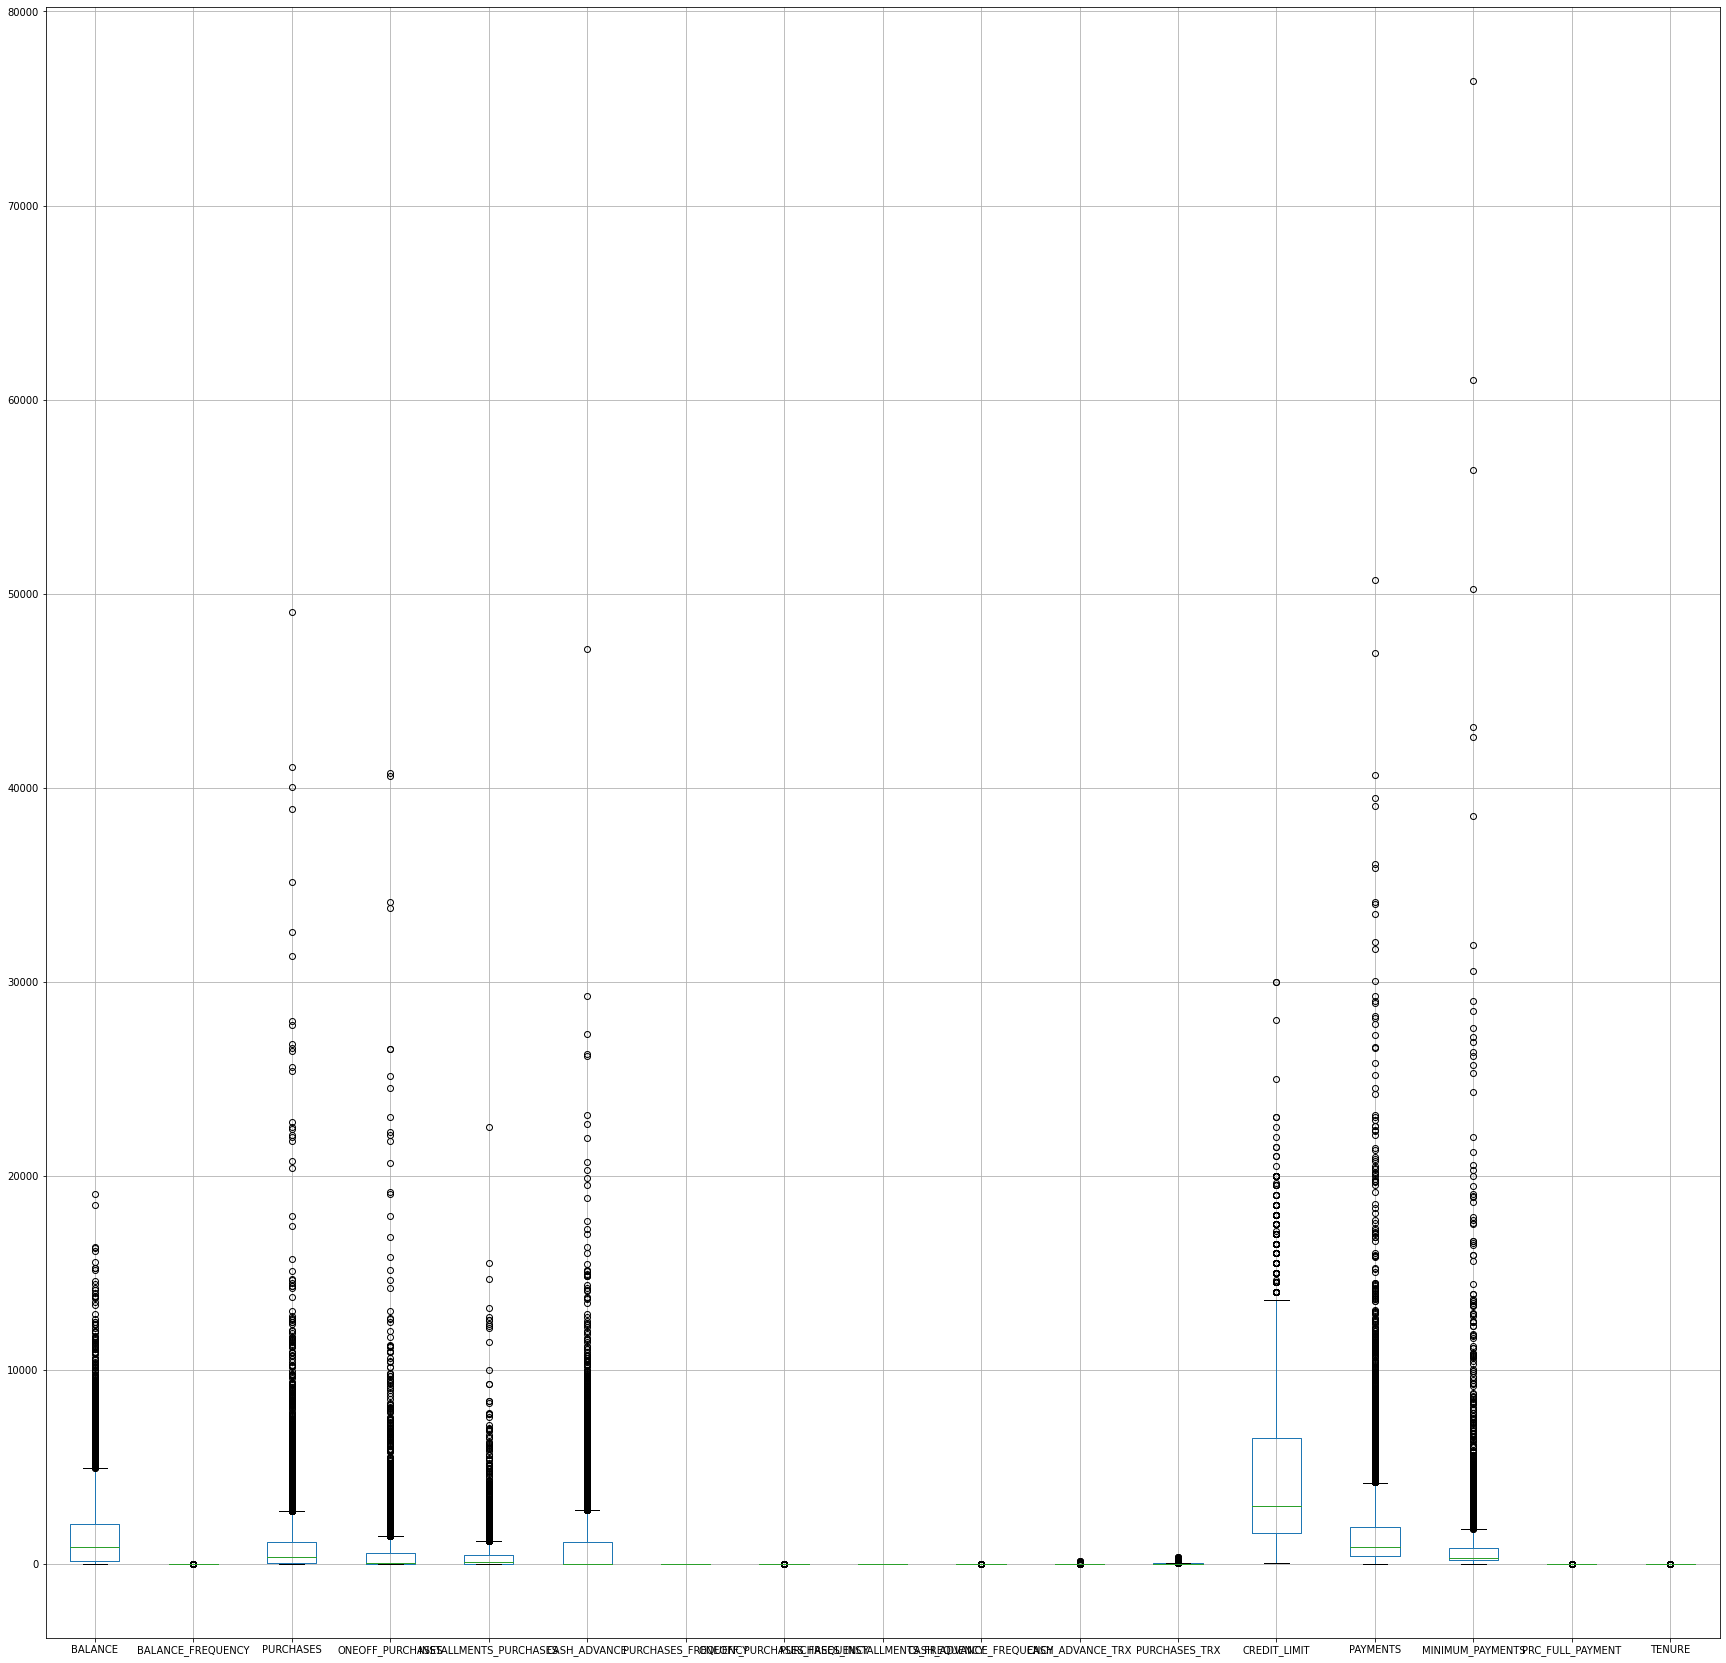

In [14]:
df_clientes.boxplot(figsize=(30,30))
plt.show()

In [15]:
df_clientes.columns.values

array(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'], dtype=object)

17


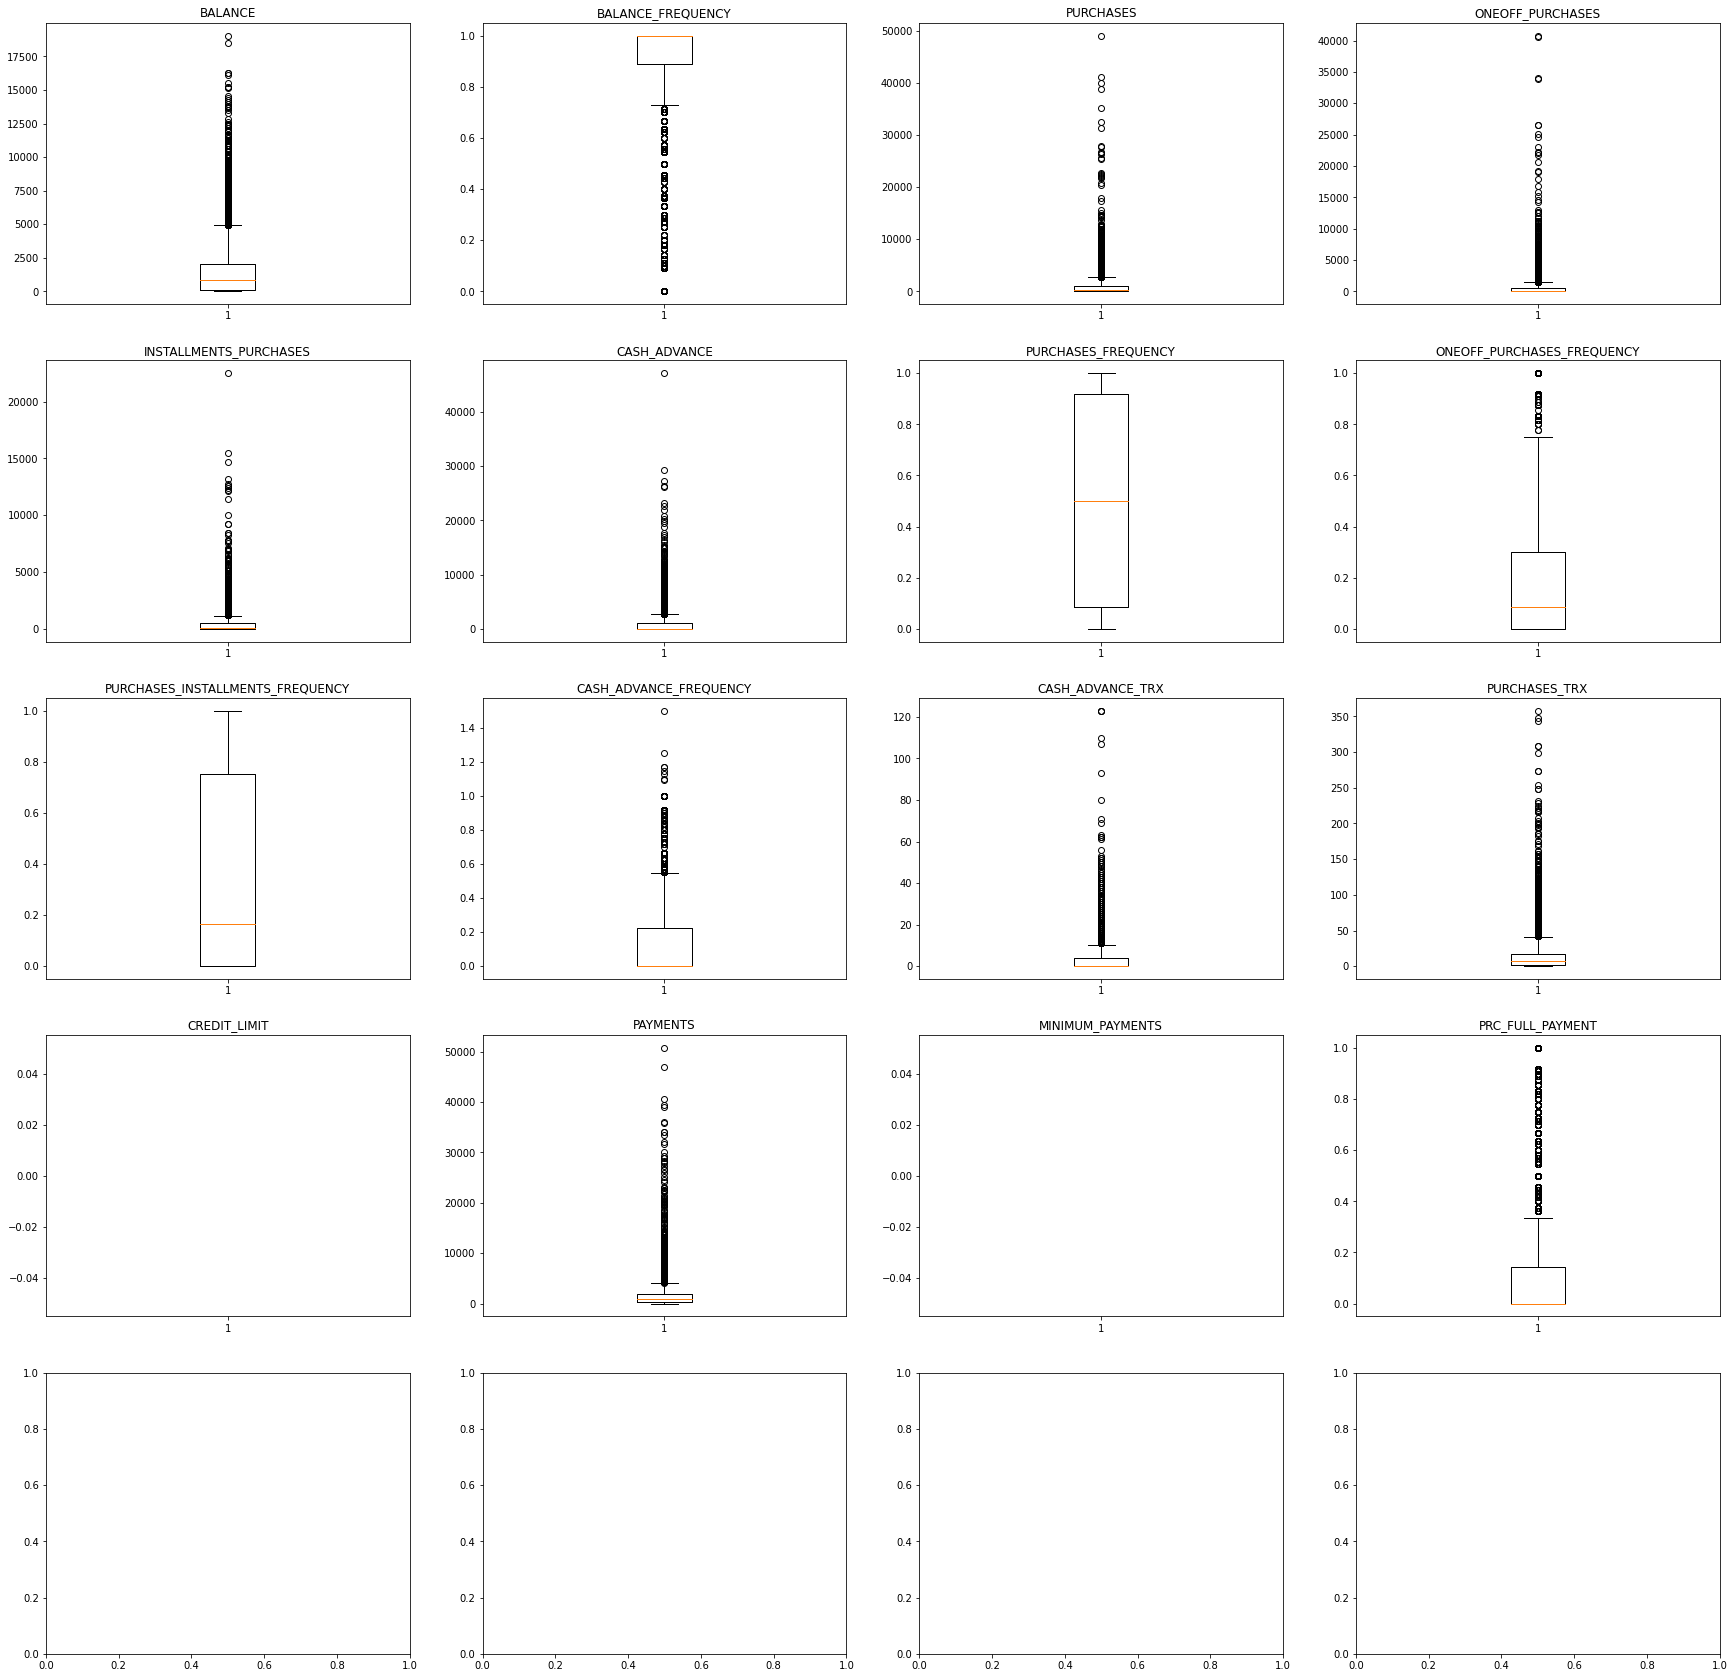

In [16]:
features = df_clientes.columns.values[1:]
print(len(features))
f, ax = plt.subplots(5,4, figsize=(30,30))
i = 0
for j in range(4):
  for a in ax[j]:
    a.boxplot(df_clientes[features[i]])
    a.set_title(features[i])
    i += 1
    if i == 17:
      break

In [17]:
df_clientes[['PAYMENTS', 'MINIMUM_PAYMENTS']].corr(method='pearson'), df_clientes[['PRC_FULL_PAYMENT', 'MINIMUM_PAYMENTS']].corr(method='pearson')

(                  PAYMENTS  MINIMUM_PAYMENTS
 PAYMENTS          1.000000          0.126651
 MINIMUM_PAYMENTS  0.126651          1.000000,
                   PRC_FULL_PAYMENT  MINIMUM_PAYMENTS
 PRC_FULL_PAYMENT          1.000000         -0.140379
 MINIMUM_PAYMENTS         -0.140379          1.000000)

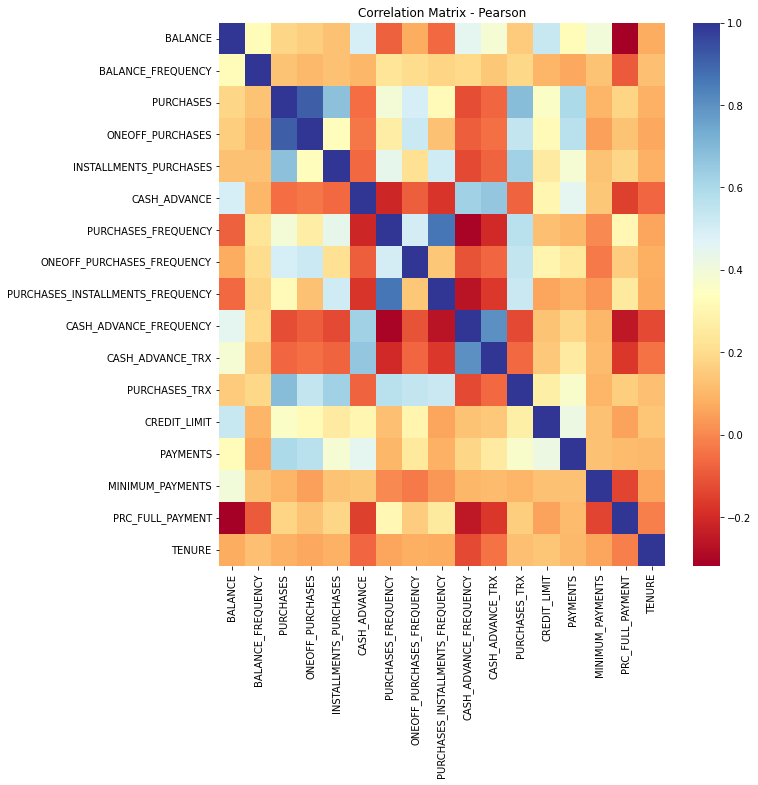

In [18]:
plt.figure(figsize=(10,10))
sns.heatmap(df_clientes.corr(method='pearson'), cbar=True, cmap='RdYlBu')
plt.title('Correlation Matrix - Pearson')
plt.show()

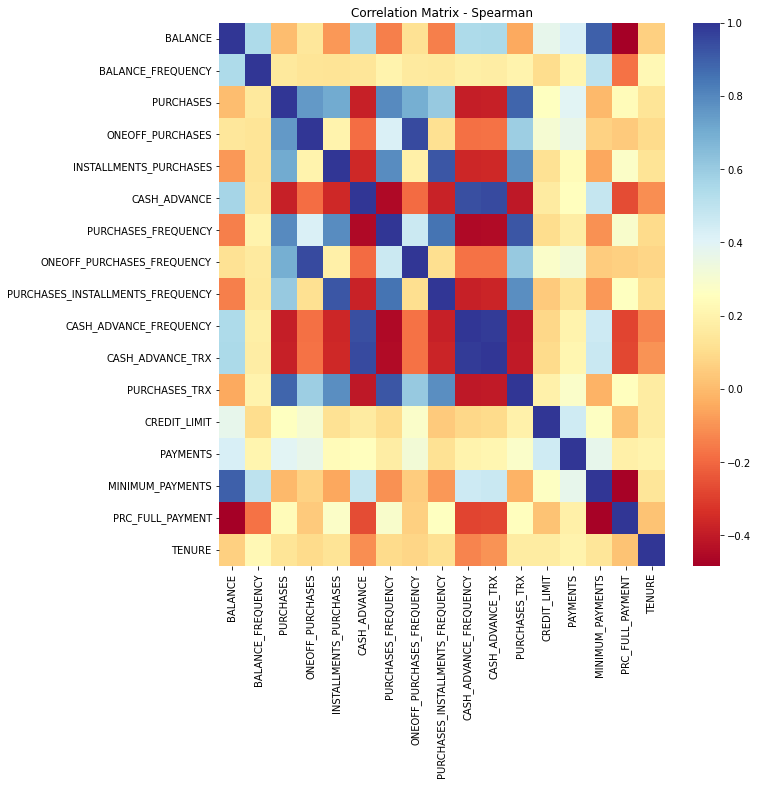

In [19]:
plt.figure(figsize=(10,10))
sns.heatmap(df_clientes.corr(method='spearman'), cbar=True, cmap='RdYlBu')
plt.title('Correlation Matrix - Spearman')
plt.show()

Aquí se presentan graficamente las matrices de correlacion de los feature. En particular se utilizan dos metricas de correlación distintas (Pearson y Spearmann)

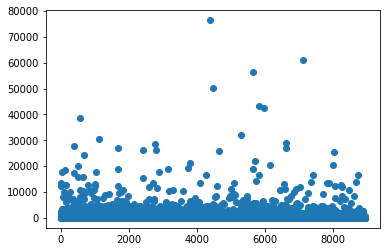

In [20]:
plt.scatter([i for i in range(len(df_clientes))], df_clientes['MINIMUM_PAYMENTS'])

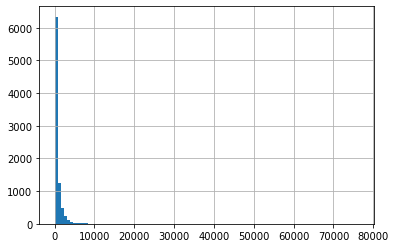

In [21]:
df_clientes['MINIMUM_PAYMENTS'].hist(bins=100)

In [22]:
len(df_clientes['MINIMUM_PAYMENTS'].where(df_clientes['MINIMUM_PAYMENTS'] <= 0.15).dropna())

5

# PARTE 2

Haga la limpieza necesaria de los datasets, considerando datos nulos y outliers. Justifique cada una de las decisiones tomadas.

In [23]:
df_clientes = df_clientes.where(df_clientes['CREDIT_LIMIT'].notna()).dropna(how='all')

In [24]:
df_clientes = df_clientes.dropna()

In [62]:
z_scores = sp.stats.zscore(df_clientes.drop(axis=1, labels='CUST_ID'))


abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
df_clientes_otliers_free = df_clientes[filtered_entries]

17


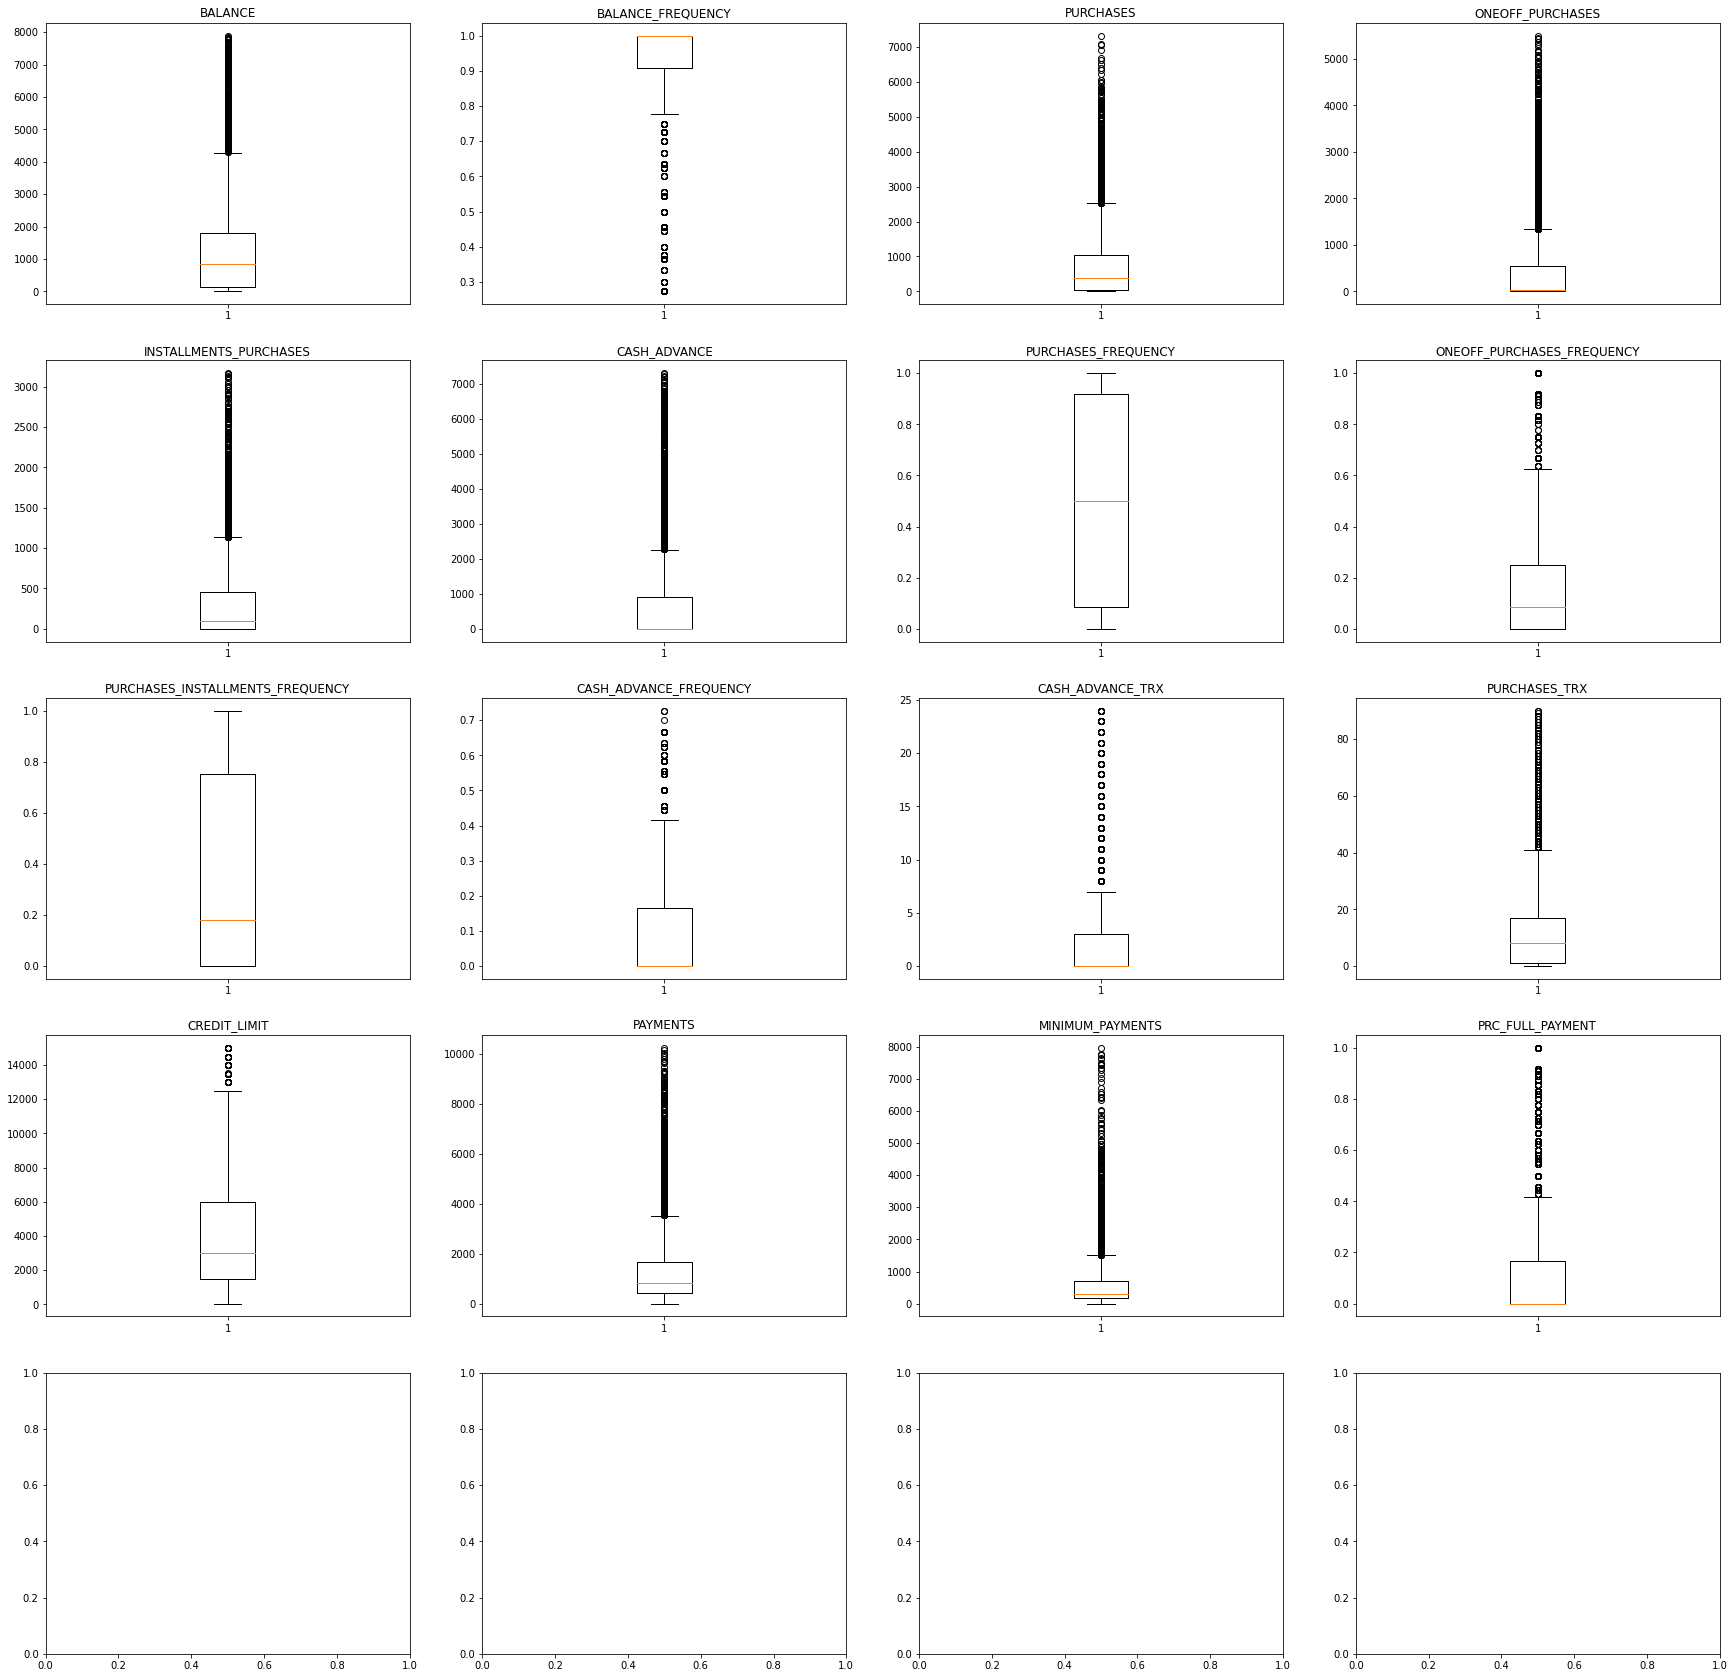

In [63]:
features = df_clientes_otliers_free.columns.values[1:]
print(len(features))
f, ax = plt.subplots(5,4, figsize=(30,30))
i = 0
for j in range(4):
  for a in ax[j]:
    a.boxplot(df_clientes_otliers_free[features[i]])
    a.set_title(features[i])
    i += 1
    if i == 17:
      break

In [61]:
len(df_clientes_otliers_free)

7190

# PARTE 3

Utilizando el algoritmo k-means efectúe una clusterización del dataset entregado. Detecte aquellos clusters relevantes para el problema, describiéndolos en términos de negocio. Debe de graficar el resultado de la clusterización, se recomienda el uso de PCA para bajar la dimensionalidad de los datos.

Utilice las técnicas que considere necesarias para determinar la cantidad óptima de clusters, justificando claramente las decisiones tomadas.

In [108]:
data = df_clientes.drop(axis=1, labels='CUST_ID').values
data_of = df_clientes_otliers_free.drop(axis=1, labels='CUST_ID').values

In [109]:
from sklearn.decomposition import PCA
components = 17
pca = PCA(n_components=components)
pca.fit(data)
data_PCA = pca.transform(data)

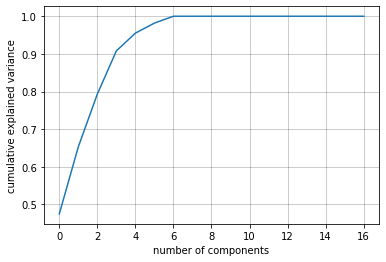

In [110]:
import matplotlib.pyplot as plt
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.grid(color='k', linestyle='-', linewidth=0.5, alpha=0.4)
plt.show()

In [111]:
expl = pca.explained_variance_ratio_
print('Primeros 6 PCA:',sum(expl[0:6]))

Primeros 6 PCA: 0.9817614502028874


In [113]:
components = 6
pca = PCA(n_components=components)
pca.fit(data)
data_PCA = pca.transform(data)

In [114]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_PCA = scaler.fit_transform(data_PCA)

In [118]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, max_iter=500) 
kmeans.fit(data_PCA)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [119]:
kmeans.inertia_

86.2702604251828

In [130]:
inertias = []
for i in range(1,20):
  kmeans = KMeans(n_clusters=i, max_iter=500, algorithm='elkan') 
  kmeans.fit(data_PCA)
  inertias += [kmeans.inertia_]

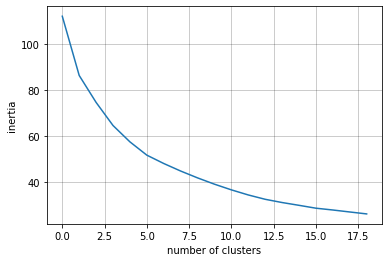

In [131]:
plt.plot(inertias)
plt.xlabel('number of clusters')
plt.ylabel('inertia')
plt.grid(color='k', linestyle='-', linewidth=0.5, alpha=0.4)
plt.show()

In [132]:
df_data_PCA = pd.DataFrame(data_PCA)

In [133]:
cluster = []
for instance in data_PCA:

  cluster += [kmeans.predict(instance.reshape(-1, len(instance)))]

df_data_PCA['Prediction'] = cluster

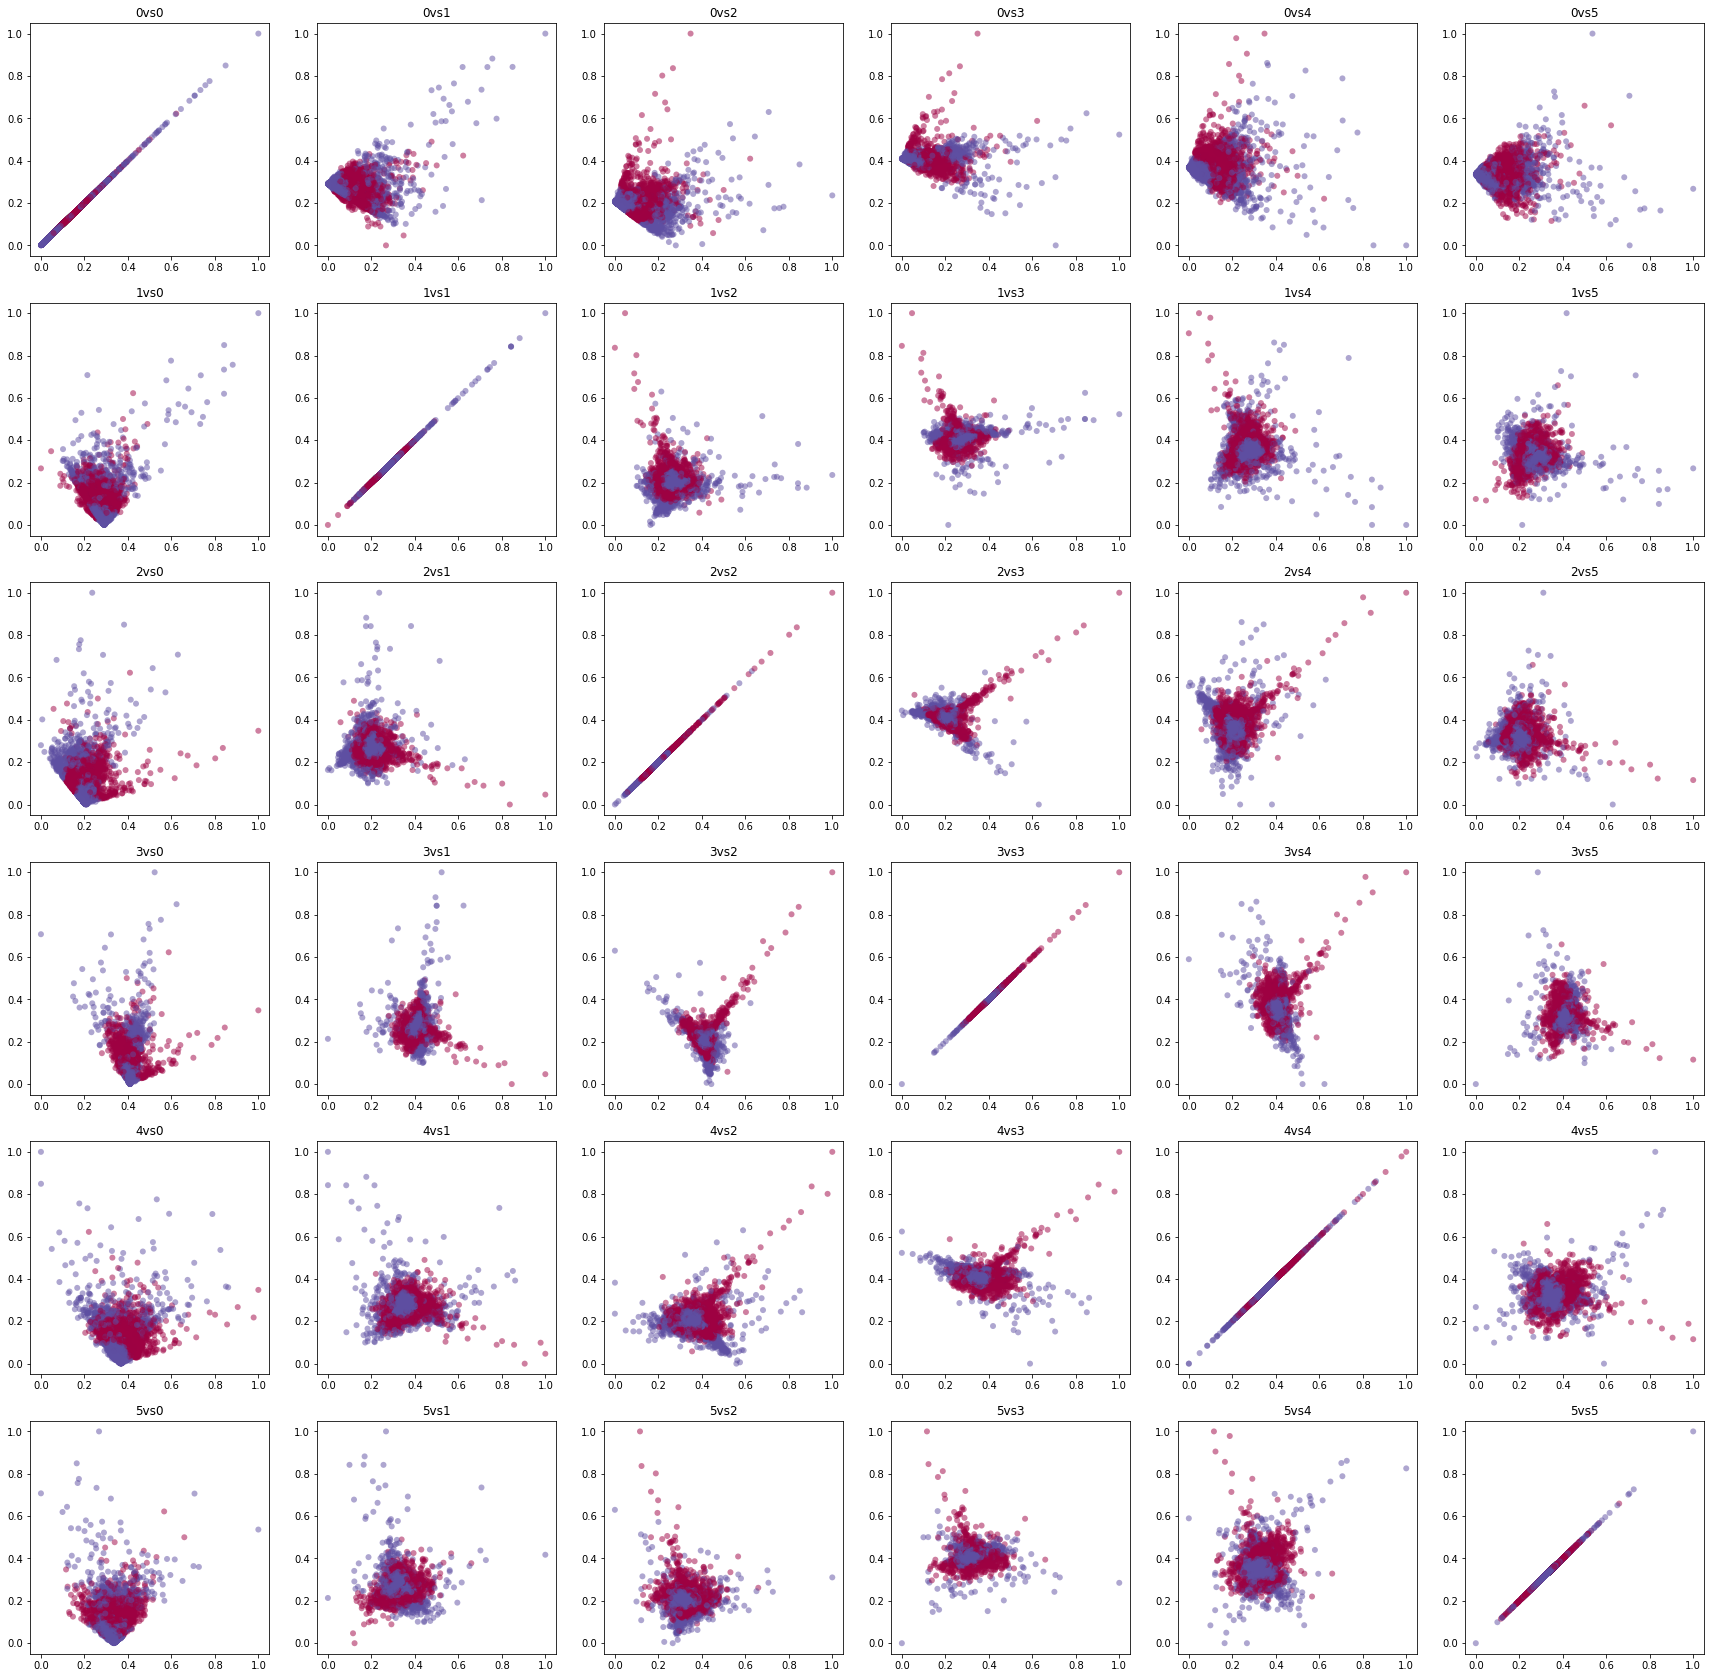

In [134]:
features = [i for i in range(6)]

f, ax = plt.subplots(6,6, figsize=(30,30))

for j in range(6):
  for i in range(6):
    a = ax[j][i]
    a.scatter(df_data_PCA[j], df_data_PCA[i], c=df_data_PCA['Prediction'], edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 2))
    a.set_title(str(j)+'vs'+str(i))



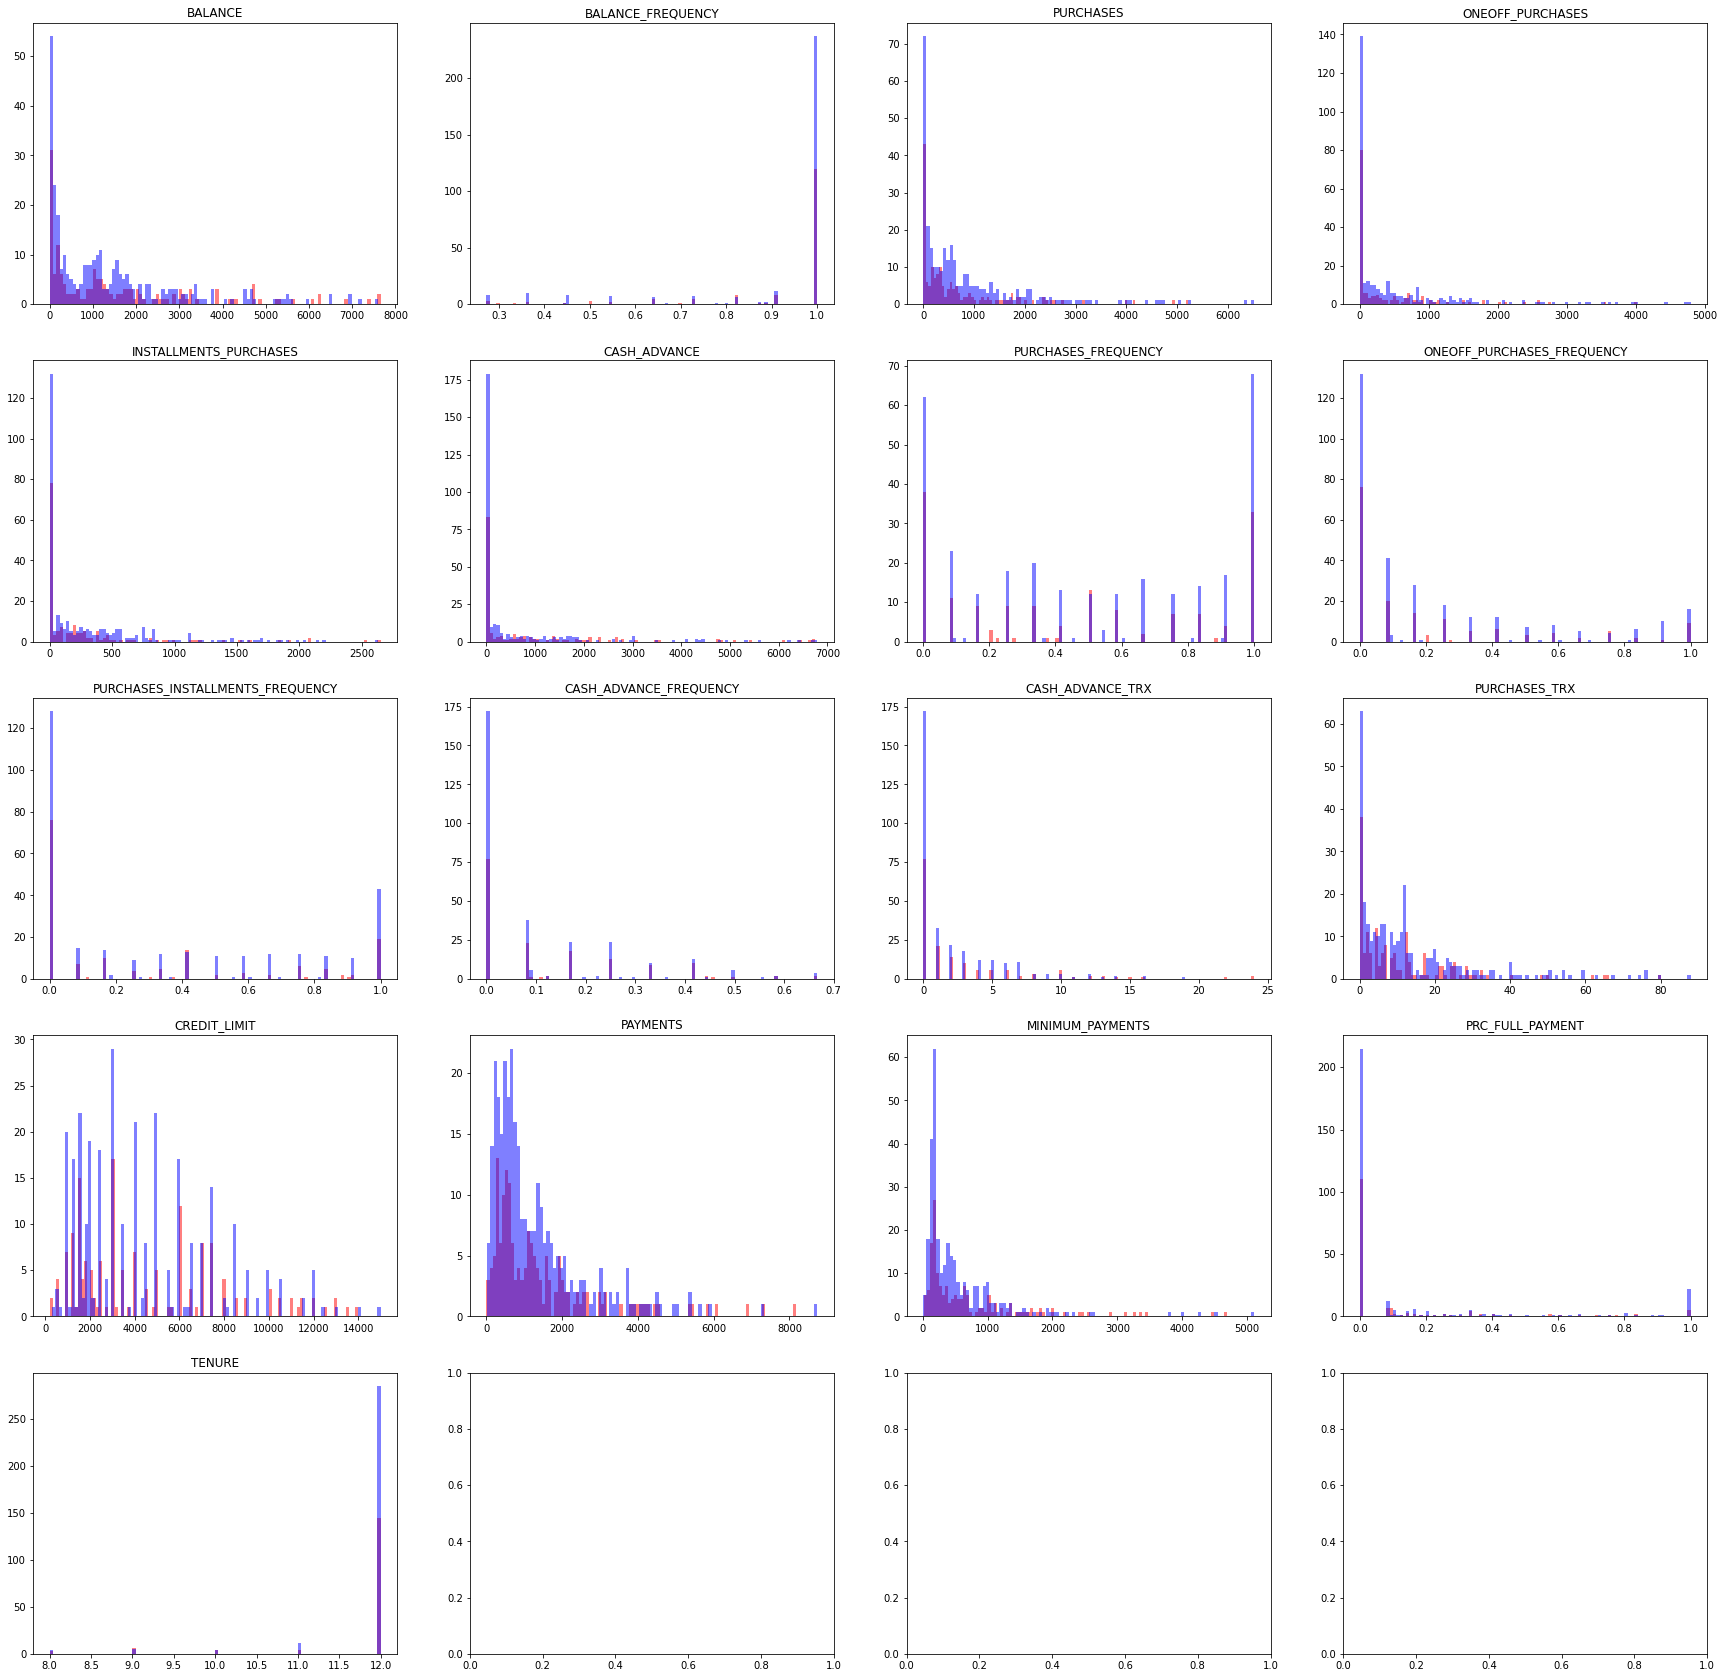

In [140]:
features = df_clientes.columns.values[1:]
c = ['r','b']
f, ax = plt.subplots(5,4, figsize=(30,30))
i = 0
for j in range(5):
  for a in ax[j]:
    if i < len(features) :
      for k in range(2):
        data = df_clientes_otliers_free[features[i]].where(df_data_PCA['Prediction'] == k)
        a.hist(data, alpha=0.5, color=c[k], label='{}' .format(k), bins=100)

      a.set_title(features[i])
      i += 1

In [143]:
kmeans = KMeans(n_clusters=6, max_iter=500, algorithm='elkan') 
kmeans.fit(data_PCA)

KMeans(algorithm='elkan', copy_x=True, init='k-means++', max_iter=500,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [144]:
kmeans.inertia_

51.73118353578297

In [145]:
cluster = []
for instance in data_PCA:

  cluster += [kmeans.predict(instance.reshape(-1, len(instance)))]

df_data_PCA['Prediction'] = cluster

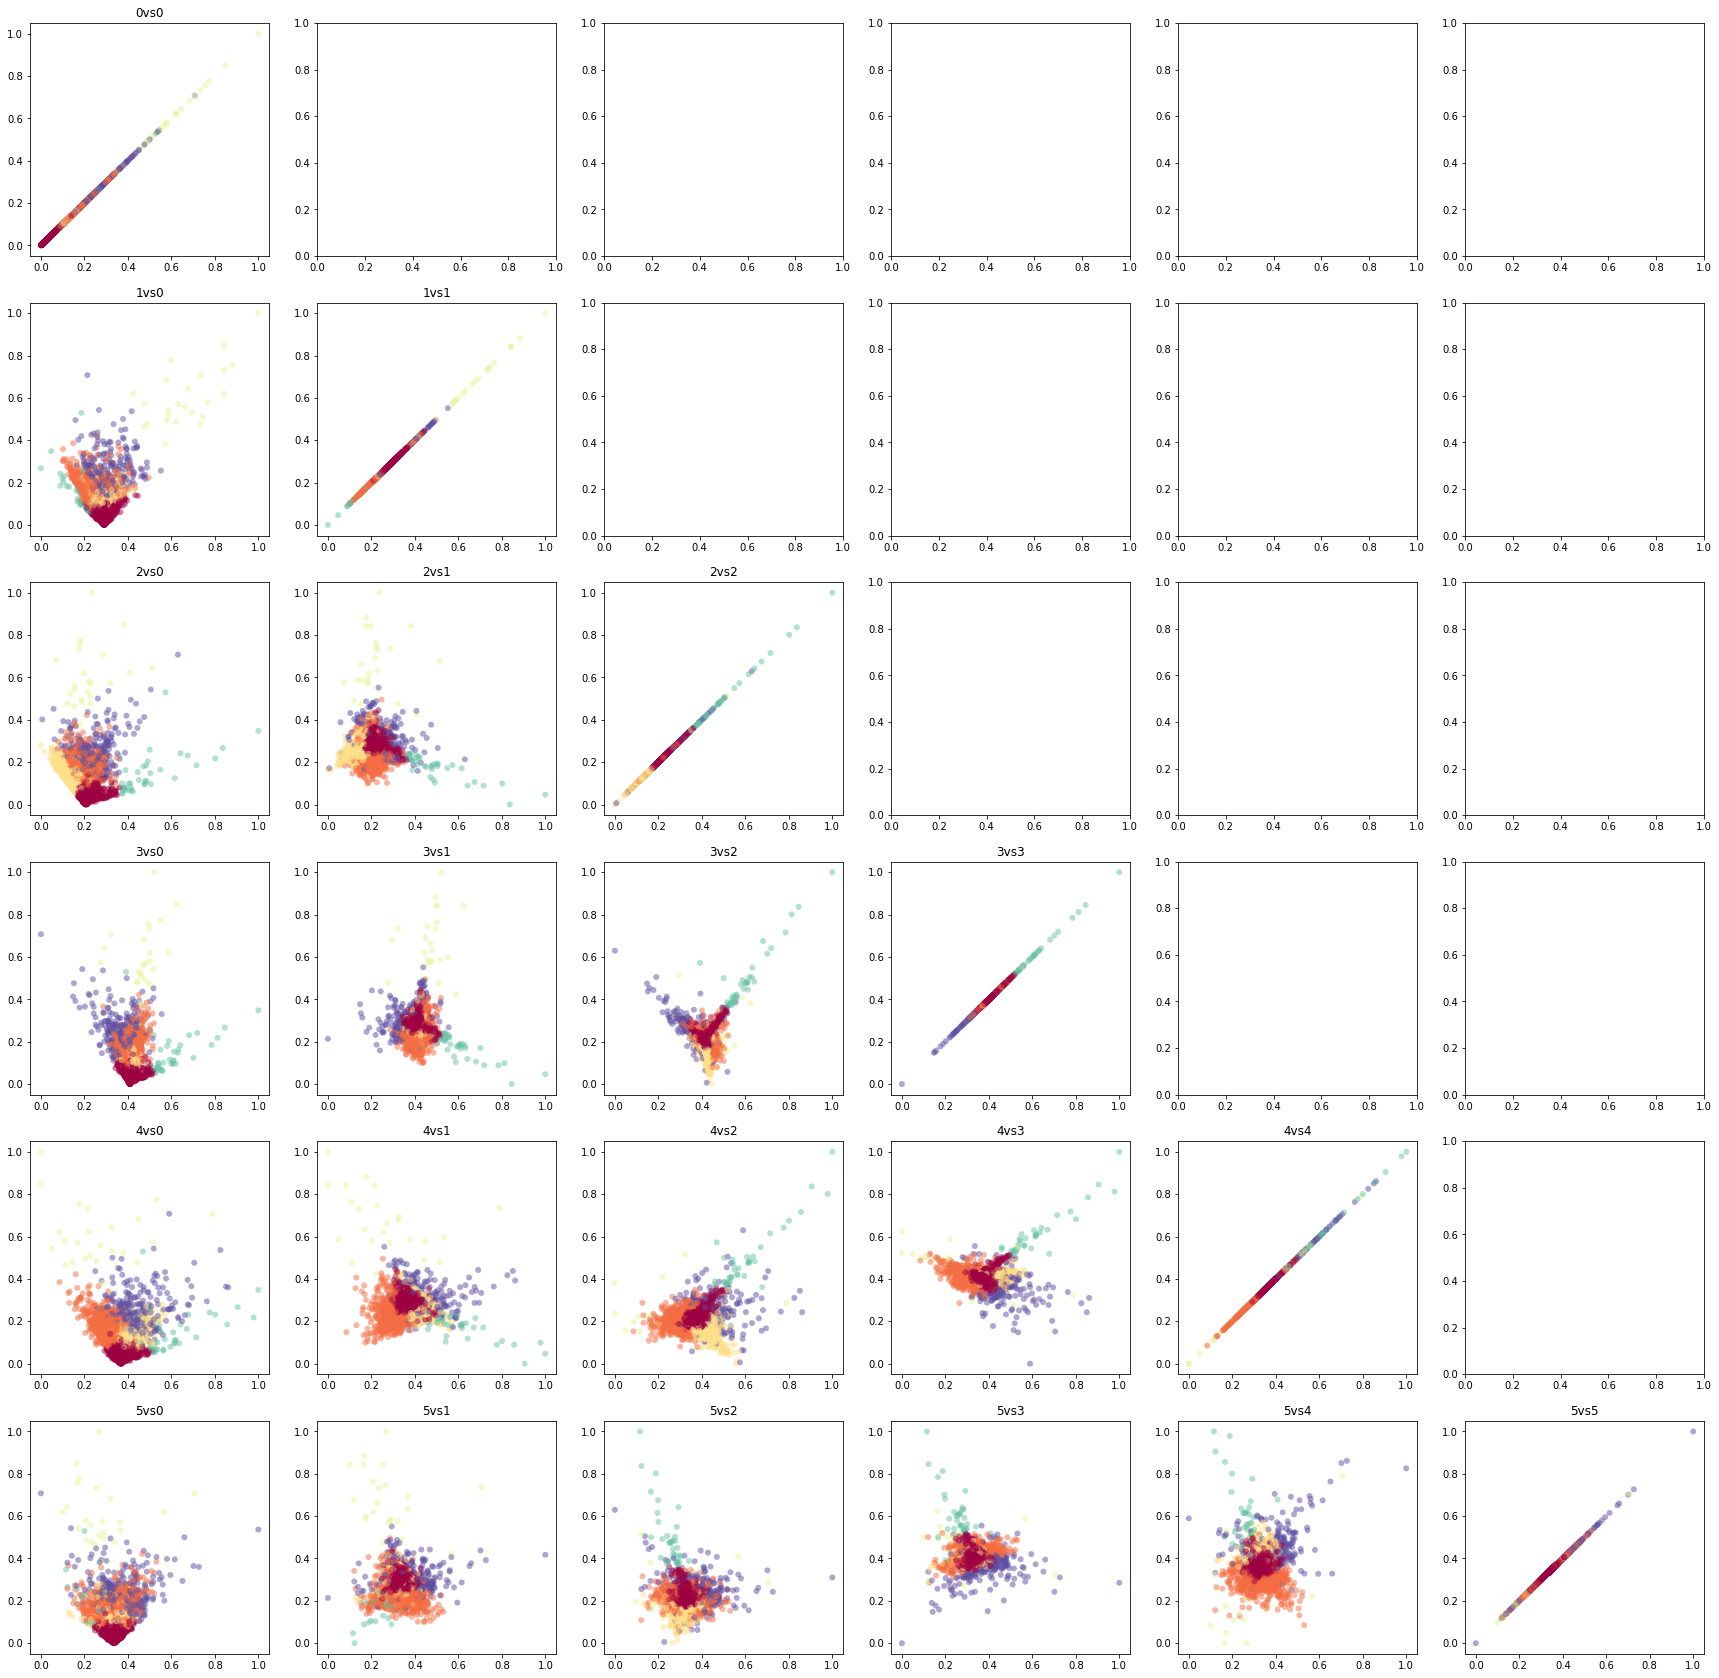

In [146]:
features = [i for i in range(6)]

f, ax = plt.subplots(6,6, figsize=(30,30))

for j in range(6):
  for i in range(6):
    if i <= j :
      a = ax[j][i]
      a.scatter(df_data_PCA[j], df_data_PCA[i], c=df_data_PCA['Prediction'], edgecolor='none', alpha=0.5,
              cmap=plt.cm.get_cmap('Spectral', 6))
      a.set_title(str(j)+'vs'+str(i))

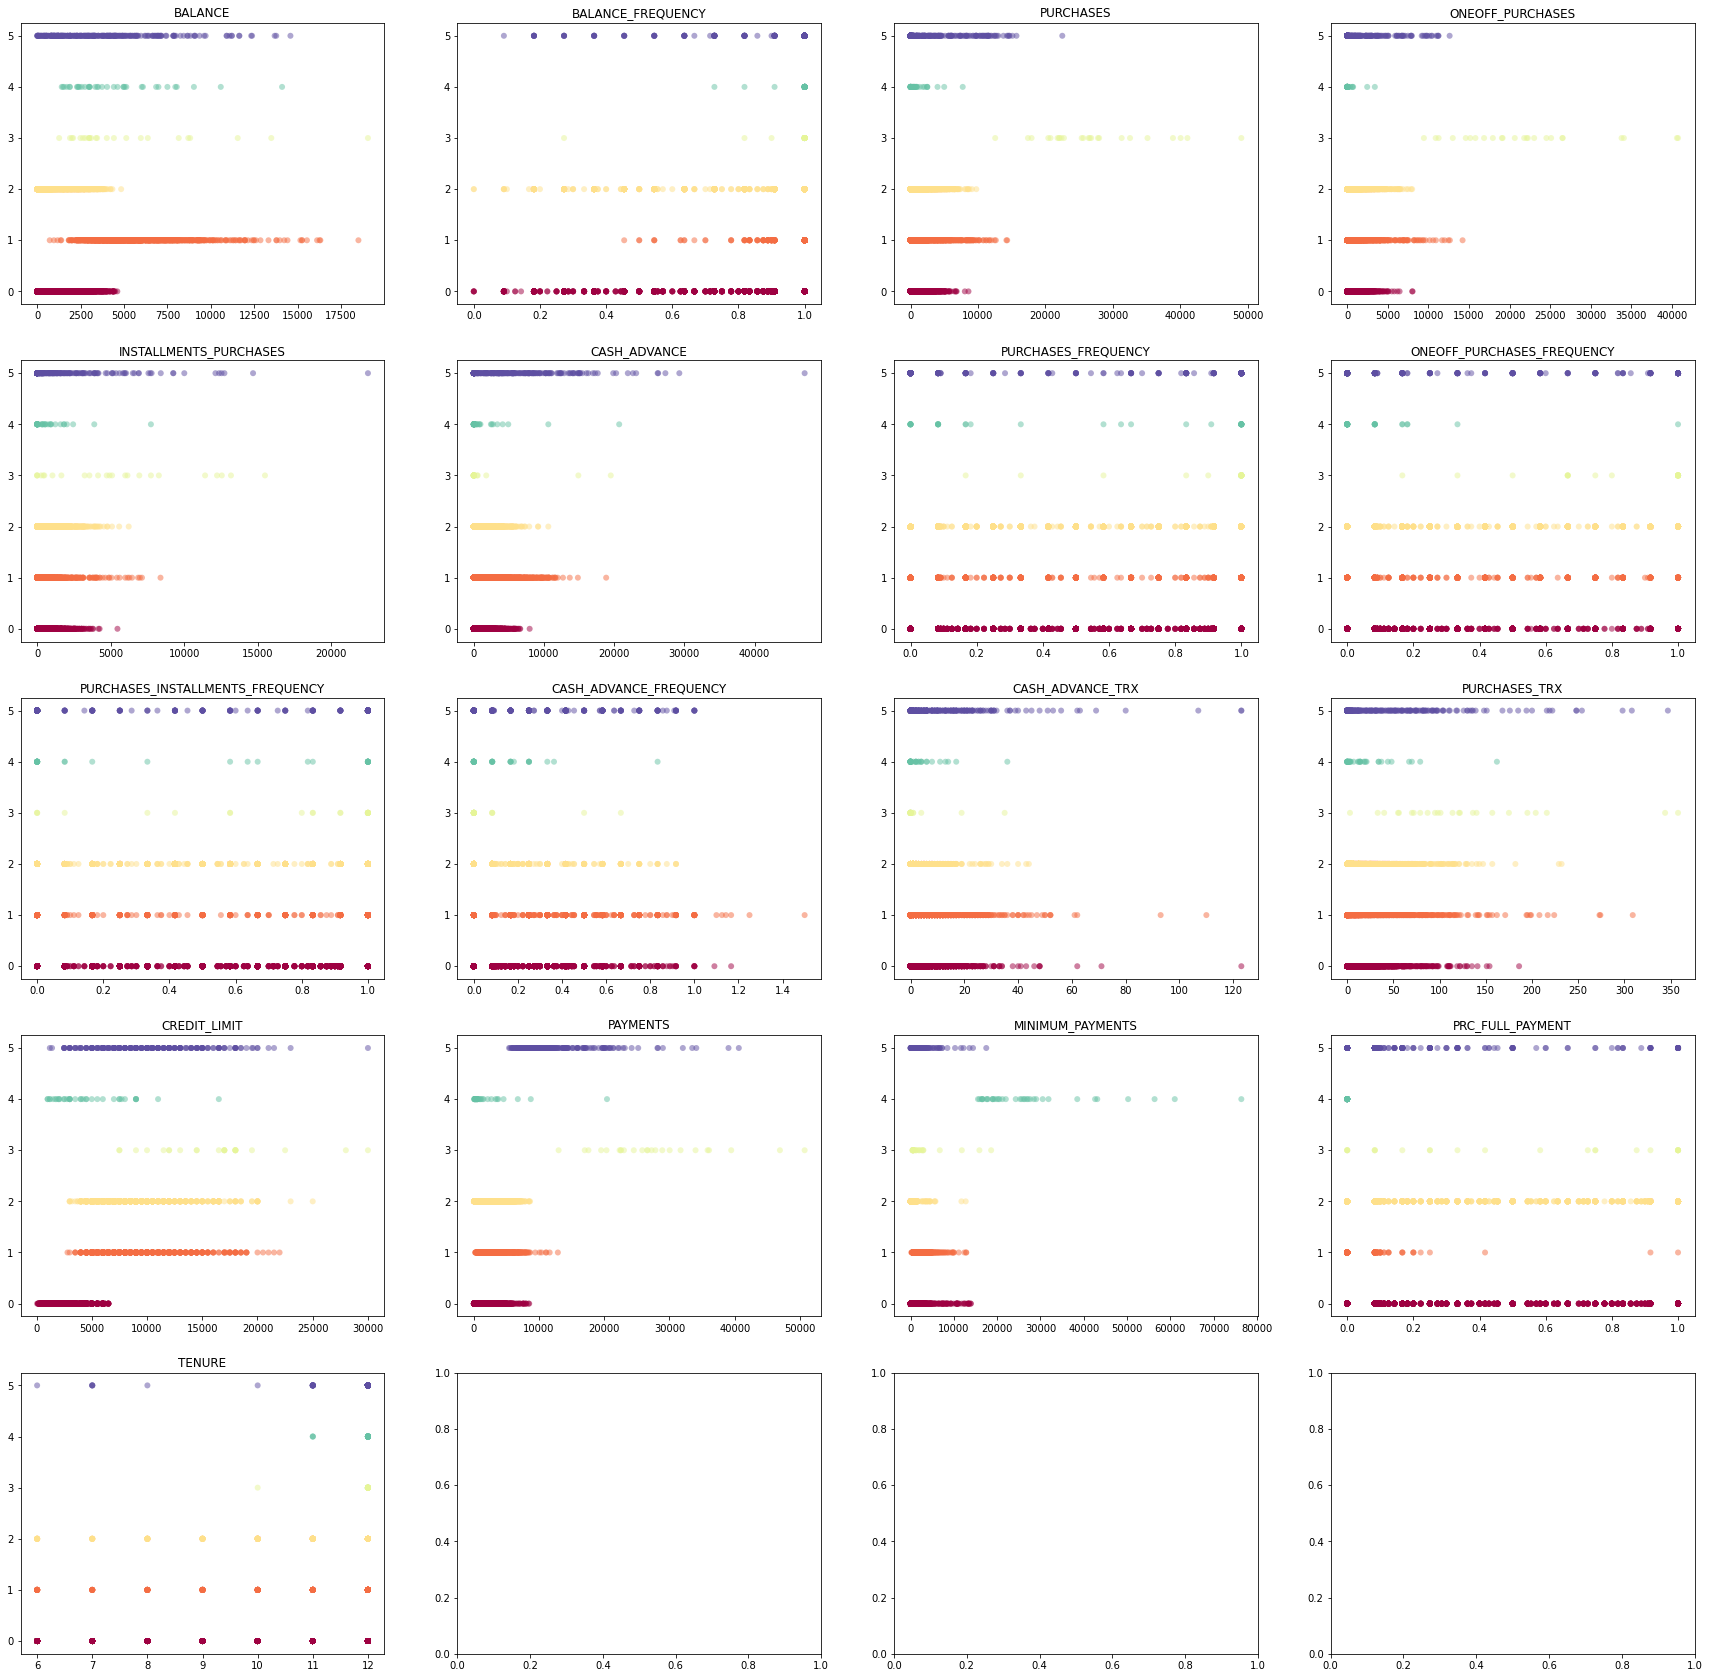

In [149]:
features = df_clientes.columns.values[1:]

f, ax = plt.subplots(5,4, figsize=(30,30))
i = 0
for j in range(5):
  for a in ax[j]:
    if i < len(features) :
      
      a.scatter(df_clientes[features[i]], df_data_PCA['Prediction'], c=df_data_PCA['Prediction'], edgecolor='none', alpha=0.5,
              cmap=plt.cm.get_cmap('Spectral', 6))
      a.set_title(features[i])
      i += 1

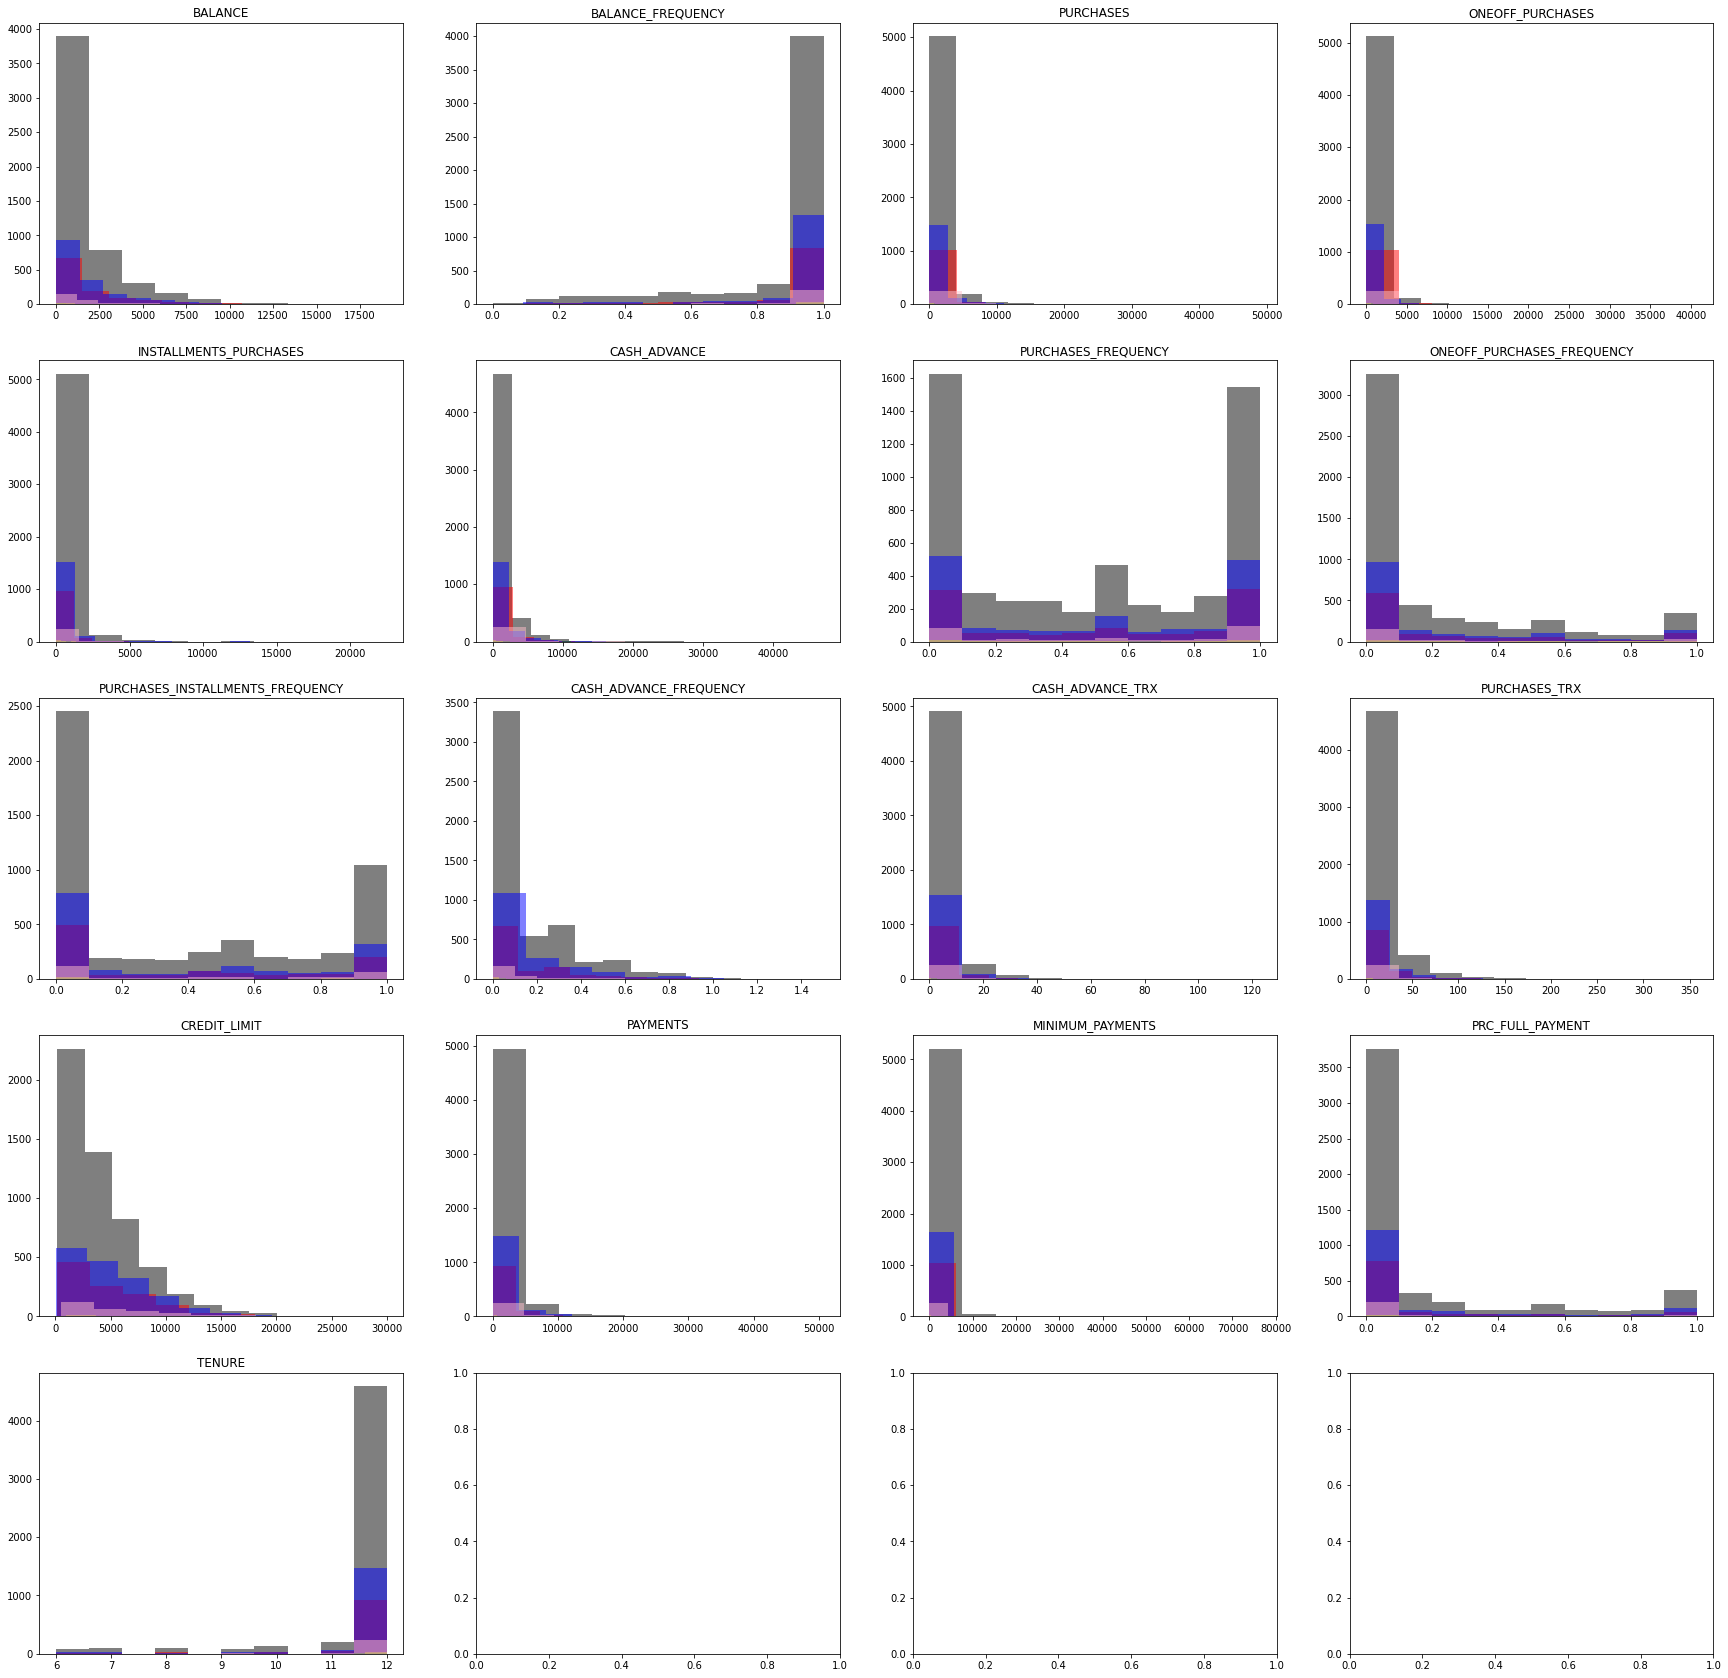

In [151]:
features = df_clientes.columns.values[1:]
c = ['k','r','b','g','y', 'pink']
f, ax = plt.subplots(5,4, figsize=(30,30))
i = 0
for j in range(5):
  for a in ax[j]:
    if i < len(features) :
      for k in range(6):
        data = df_clientes[features[i]].where(df_data_PCA['Prediction'] == k)
        a.hist(data, alpha=0.5, color=c[k], label='{}' .format(k))

      a.set_title(features[i])
      i += 1

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is de

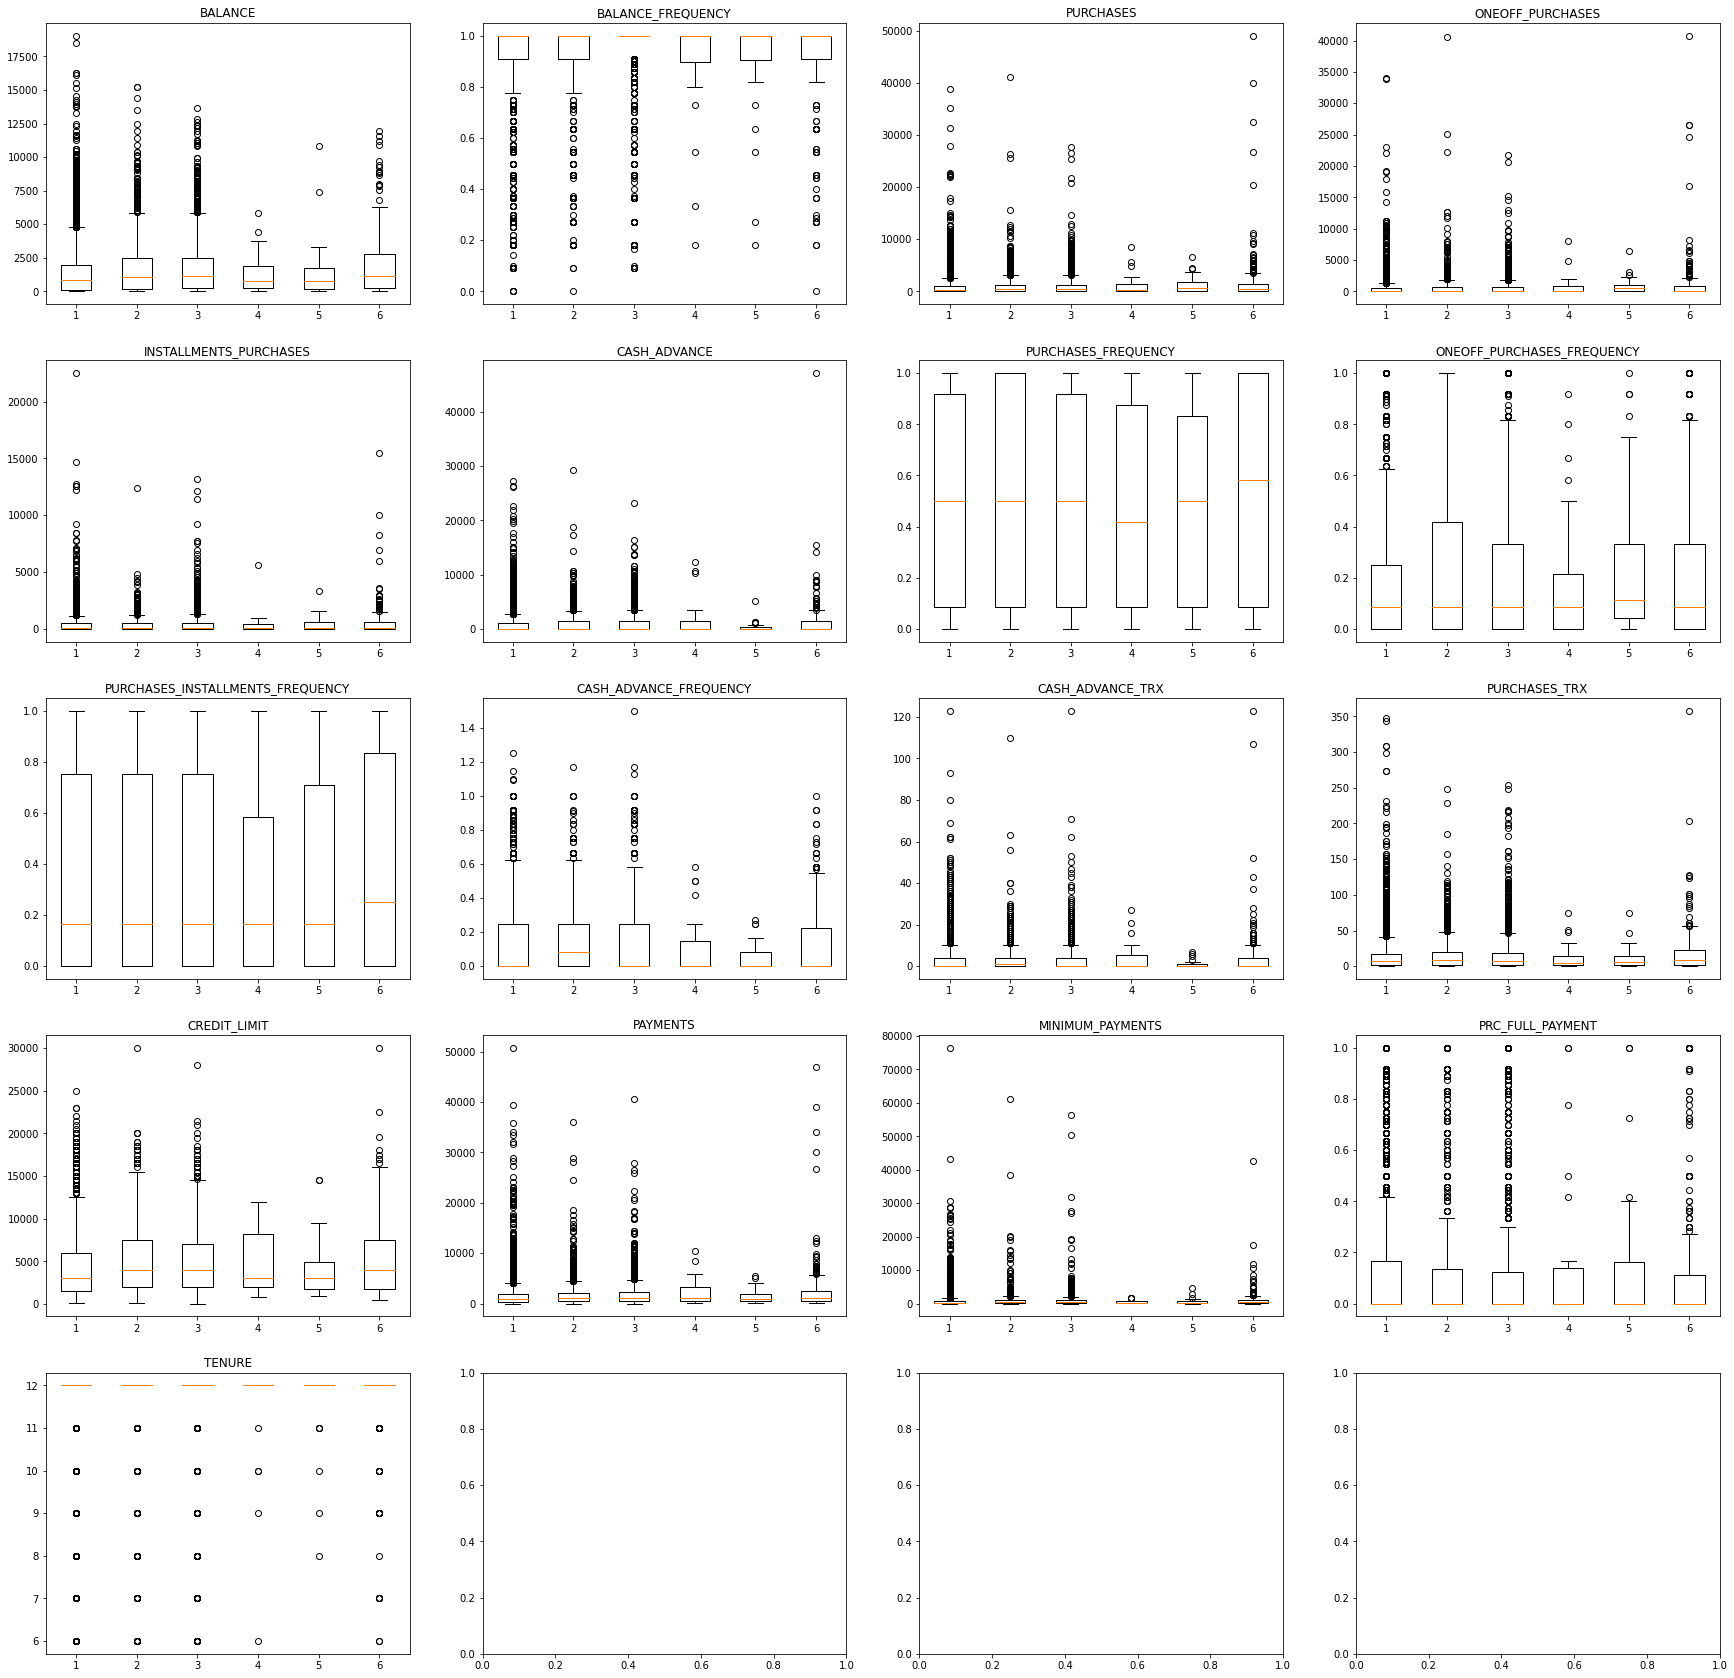

In [172]:
features = df_clientes.columns.values[1:]
c = ['k','r','b','g','y', 'pink']
f, ax = plt.subplots(5,4, figsize=(30,30))
i = 0
for j in range(5):
  for a in ax[j]:
    if i < len(features) :
      # for k in range(6):
      data = [(df_clientes[features[i]].where(df_data_PCA['Prediction'] == k).dropna()) for k in range(6)]
      a.boxplot(data)

      a.set_title(features[i])
      i += 1

# PARTE 4

En sus propias palabras, describa las técnicas de clustering basadas en densidad, en particular el algoritmo DBSCAN. Aplique DBSCAN al dataset y compare los resultados con los obtenidos en la parte 3.

2       1.000000
5       1.000000
7       1.000000
8       1.000000
12      1.000000
          ...   
8211    0.454545
8386    0.363636
8424    1.000000
8463    1.000000
8468    0.454545
Name: BALANCE_FREQUENCY, Length: 1667, dtype: float64

# PARTE 5

Estudie y explique el método de Ward utilizado en clustering aglomerativo, en particular, la implementación de sklearn.

# PARTE 6

Planificando próximas etapas, el banco requiere armar un cuestionario para nuevos clientes, de forma de poder ofrecer el producto a usuarios de los cuales no cuenta con histórico transaccional. Para esto, el Departamento Comercial solicita que se construya, a partir del análisis de datos, el listado de preguntas y un modelo predictivo que en función de las respuestas retorne la propensión de compra de los productos.
En caso de que entienda que no es posible cumplir con alguno de estos requerimientos, documente los motivos que lo llevaron a tomar esa conclusión.

# PARTE 7

Ensaye una discusión general del trabajo realizado, haciendo los comentarios y recomendaciones que considere necesarias.